In [2]:
import pandas as pd

cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')


master_data = pd.merge(cab_data,transaction_data,on='Transaction ID',how='outer')

master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [4]:
master_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,4.400980e+05,359392.000000,359392.000000,359392.000000,359392.000000,440098.000000
mean,1.022006e+07,42964.067998,22.567254,423.443311,286.190113,23619.513120
std,1.270455e+05,307.467197,12.233526,274.378911,157.993661,21195.549816
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000
25%,1.011004e+07,42697.000000,12.000000,206.437500,151.200000,3530.000000
50%,1.022006e+07,42988.000000,22.440000,386.360000,282.480000,15168.000000
75%,1.033008e+07,43232.000000,32.960000,583.660000,413.683200,43884.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000


In [30]:
master_data['Benefit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Benefit per kilometer'] = master_data['Benefit']/master_data['KM Travelled']
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Benefit,Benefit per kilometer
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,57.315,1.882266
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,23.666,0.826904
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,27.568,3.049558
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,25.798,0.777751
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,16.844,1.929439


In [42]:
num_master_data = master_data.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

num_master_data = num_master_data.drop(['Transaction ID', 'Date of Travel', 'Customer ID'], axis = 1)

num_master_data.head()

,KM Travelled,Price Charged,Cost of Trip,Benefit,Benefit per kilometer
0,30.45,370.95,313.635,57.315,1.882266
1,28.62,358.52,334.854,23.666,0.826904
2,9.04,125.20,97.632,27.568,3.049558
3,33.17,377.40,351.602,25.798,0.777751
4,8.73,114.62,97.776,16.844,1.929439


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f022968c050>,
      dtype=object)

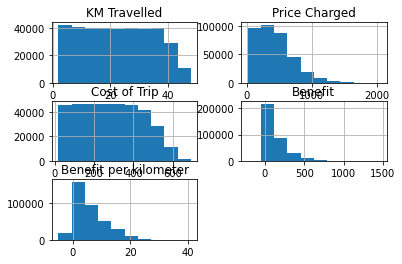

In [43]:
import matplotlib.pyplot as plt

num_master_data.hist()